In [2]:
import pandas as pd
import numpy as np

In [3]:
df_movies = pd.read_csv('https://bit.ly/imdbratings')

In [4]:
df_movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [6]:
df_movies['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [7]:
df_movies['genre'].value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [8]:
# compute the cross-tabulation of two series
pd.crosstab(df_movies['genre'], df_movies['content_rating'])

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
# MISSING VALUES

In [71]:
df_listing = pd.read_csv('listings.csv')

In [13]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15421 entries, 0 to 15420
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15421 non-null  int64  
 1   name                            15421 non-null  object 
 2   host_id                         15421 non-null  int64  
 3   host_name                       15419 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   15421 non-null  int64  
 6   latitude                        15421 non-null  float64
 7   longitude                       15421 non-null  float64
 8   room_type                       15421 non-null  object 
 9   price                           11285 non-null  float64
 10  minimum_nights                  15421 non-null  int64  
 11  number_of_reviews               15421 non-null  int64  
 12  last_review                     

In [14]:
df_listing.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
7762,535739768783694610,"New Austin home, travel nurse/corporate tech",439613795,Rita And Ben,NaN,78747,30.124780,-97.778030,Entire home/apt,125.0,30,2,2023-06-14,0.13,2,310,1,NaN
2967,21069049,East Austin Charmer-8 mins to Downtown,78156116,ATX Rentals,NaN,78722,30.291420,-97.713140,Entire home/apt,146.0,30,52,2024-01-23,0.66,4,127,5,NaN
4577,34771265,Charming Town Home near the East Side!,102372132,Paawan,NaN,78741,30.235340,-97.702320,Entire home/apt,NaN,3,2,2019-06-09,0.03,1,0,0,NaN
13039,973424129291852161,Downtown charming one bedroom,95139463,Felicity,NaN,78705,30.283921,-97.747357,Entire home/apt,125.0,7,4,2024-01-01,0.69,21,84,4,NaN
7042,52110039,Private Oasis - 2 minutes from Downtown & River!,39176601,Natalie,NaN,78702,30.252200,-97.722980,Entire home/apt,350.0,3,46,2024-01-01,1.52,1,50,16,NaN
5944,46893627,Spacious Austin Home - Min from COTA & ATX Air...,3086224,Fiona,NaN,78725,30.215070,-97.636690,Entire home/apt,NaN,2,74,2022-11-22,1.89,1,0,0,NaN
1578,10706987,1 Bedroom Apt on South Congress,55324539,Natalie,NaN,78704,30.252910,-97.746870,Private room,NaN,2,1,2016-03-22,0.01,1,0,0,NaN
5285,41716571,Hill Country Luxury Home - 15 min to Downtown,104667154,Evan,NaN,78731,30.332790,-97.777350,Entire home/apt,NaN,2,6,2021-05-22,0.12,1,0,0,NaN
14617,1076275109620097124,Electrify with 4BR Next to Tesla,277983957,Vacay,NaN,78724,30.259770,-97.589640,Entire home/apt,173.0,3,1,2024-03-01,1.00,10,242,1,NaN
9434,699357739076882496,Cheerful 4 bedroom home with a treehouse feel,170967878,Amrin,NaN,78746,30.261910,-97.799000,Entire home/apt,NaN,30,0,NaN,NaN,2,0,0,NaN


In [ ]:
# NaN stands for "Not a Number"  and indicates a missing value.

In [15]:
df_listing.isnull().head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True


In [16]:
df_listing.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             2
neighbourhood_group               15421
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              4136
minimum_nights                        0
number_of_reviews                     0
last_review                        3100
reviews_per_month                  3100
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           15421
dtype: int64

<AxesSubplot:ylabel='Frequency'>

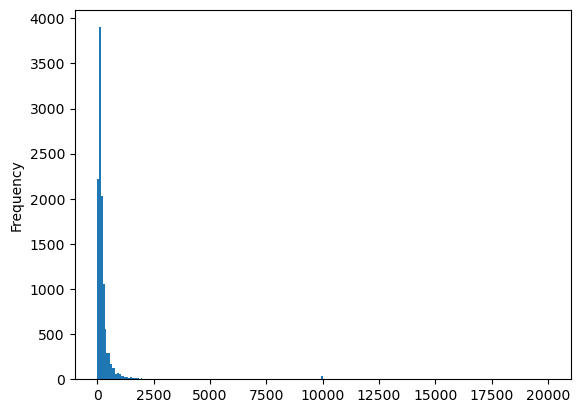

In [23]:
df_listing[~df_listing['price'].isna()]['price'].plot(kind='hist', bins = 250)

In [24]:
df_listing.shape

(15421, 18)

In [25]:
# if 'any' values are missing a row, then the method to drop entire row

df_listing.dropna(how = 'any')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license


In [28]:
# if 'all' values are missing in a row, then drop that row only

df_listing.dropna(how = 'all').head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,107.0,2,671,2024-03-11,3.66,1,310,39,NaN
1,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,45.0,1,295,2024-01-27,1.74,1,2,20,NaN


In [30]:
df_listing.dropna(axis = 1).head(2)

,id,name,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,78702,30.26057,-97.73441,Entire home/apt,2,671,1,310,39
1,5769,NW Austin Room,8186,78729,30.45697,-97.78422,Private room,1,295,1,2,20


In [32]:
df_listing.fillna(0).head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,0.0,78702,30.26057,-97.73441,Entire home/apt,107.0,2,671,2024-03-11,3.66,1,310,39,0.0
1,5769,NW Austin Room,8186,Elizabeth,0.0,78729,30.45697,-97.78422,Private room,45.0,1,295,2024-01-27,1.74,1,2,20,0.0


In [35]:
df_listing['price'].fillna(df_listing['price'].median())

0        107.0
1         45.0
2        152.0
3        159.0
4         48.0
         ...  
15416     64.0
15417     74.0
15418     68.0
15419    262.0
15420     71.0
Name: price, Length: 15421, dtype: float64

In [34]:
df_listing['price'].median()

152.0

## Dates and Times in Pandas

In [37]:
df_listing.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,107.0,2,671,2024-03-11,3.66,1,310,39,NaN
1,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,45.0,1,295,2024-01-27,1.74,1,2,20,NaN
2,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,NaN,30,120,2022-10-17,0.69,1,0,0,NaN


In [36]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15421 entries, 0 to 15420
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15421 non-null  int64  
 1   name                            15421 non-null  object 
 2   host_id                         15421 non-null  int64  
 3   host_name                       15419 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   15421 non-null  int64  
 6   latitude                        15421 non-null  float64
 7   longitude                       15421 non-null  float64
 8   room_type                       15421 non-null  object 
 9   price                           11285 non-null  float64
 10  minimum_nights                  15421 non-null  int64  
 11  number_of_reviews               15421 non-null  int64  
 12  last_review                     

In [39]:
df_listing.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,107.0,2,671,2024-03-11,3.66,1,310,39,NaN
1,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,45.0,1,295,2024-01-27,1.74,1,2,20,NaN
2,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,NaN,30,120,2022-10-17,0.69,1,0,0,NaN


In [41]:
df_listing['last_review'].str.slice(5,7).head(3)

0    03
1    01
2    10
Name: last_review, dtype: object

In [42]:
df_listing['last_review'] = pd.to_datetime(df_listing['last_review'])

In [45]:
df_listing.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                              int64
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                  float64
dtype: object

In [46]:
# access to month
df_listing['last_review'].dt.month.head()

0     3.0
1     1.0
2    10.0
3     3.0
4     5.0
Name: last_review, dtype: float64

In [47]:
df_listing['last_review'].dt.year.head()

0    2024.0
1    2024.0
2    2022.0
3    2024.0
4    2023.0
Name: last_review, dtype: float64

In [48]:
df_listing['last_review'].dt.hour.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: last_review, dtype: float64

In [50]:
df_listing['last_review'].dt.weekofyear.head()

/var/folders/_y/4s2tthkj1931hnkd_gyz26fh0000gn/T/ipykernel_47923/133762111.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_listing['last_review'].dt.weekofyear.head()


0    11.0
1     4.0
2    42.0
3    11.0
4    20.0
Name: last_review, dtype: float64

In [ ]:
# Perform a mathematical operations with time stamps

In [51]:
df_listing['last_review'].max()

Timestamp('2024-03-23 00:00:00')

In [52]:
(df_listing['last_review'].max() - df_listing['last_review'].min())

Timedelta('4391 days 00:00:00')

In [53]:
(df_listing['last_review'].max() - df_listing['last_review'].min()).days

4391

In [54]:
df_listing['year'] = df_listing['last_review'].dt.year

In [55]:
df_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,107.0,2,671,2024-03-11,3.66,1,310,39,NaN,2024.0
1,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,45.0,1,295,2024-01-27,1.74,1,2,20,NaN,2024.0
2,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,NaN,30,120,2022-10-17,0.69,1,0,0,NaN,2022.0
3,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,NaN,78704,30.26034,-97.76487,Entire home/apt,159.0,3,314,2024-03-13,2.06,1,190,22,NaN,2024.0
4,8502,Woodland Studio Lodging,25298,Karen,NaN,78741,30.23466,-97.73682,Entire home/apt,48.0,4,51,2023-05-16,0.30,1,163,3,NaN,2023.0


In [57]:
df_listing['year'].value_counts().sort_index()

2012.0       3
2013.0       9
2014.0      19
2015.0      99
2016.0     202
2017.0     243
2018.0     326
2019.0     397
2020.0     247
2021.0     303
2022.0     739
2023.0    2725
2024.0    7009
Name: year, dtype: int64

<AxesSubplot:>

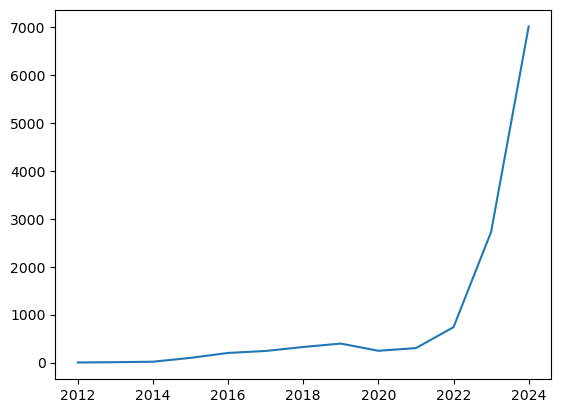

In [58]:
df_listing['year'].value_counts().sort_index().plot()

In [60]:
df_listing['month'] = df_listing['last_review'].dt.month

In [62]:
df_listing.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                              int64
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                  float64
year                                     float64
month                                    float64
dtype: object

In [64]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15421 entries, 0 to 15420
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15421 non-null  int64         
 1   name                            15421 non-null  object        
 2   host_id                         15421 non-null  int64         
 3   host_name                       15419 non-null  object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   15421 non-null  int64         
 6   latitude                        15421 non-null  float64       
 7   longitude                       15421 non-null  float64       
 8   room_type                       15421 non-null  object        
 9   price                           11285 non-null  float64       
 10  minimum_nights                  15421 non-null  int64         
 11  nu

In [68]:
#df_listing['year_month'] = 
df_listing['year'].astype(object) + df_listing['month'].astype(object)

0        2027.0
1        2025.0
2        2032.0
3        2027.0
4        2028.0
          ...  
15416       NaN
15417       NaN
15418       NaN
15419       NaN
15420       NaN
Length: 15421, dtype: object

In [80]:
df_listing['year_month'] = df_listing['last_review'].str.slice(0,7)

In [81]:
df_listing.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year_month
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,107.0,2,671,2024-03-11,3.66,1,310,39,NaN,2024-03
1,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,45.0,1,295,2024-01-27,1.74,1,2,20,NaN,2024-01
2,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,NaN,30,120,2022-10-17,0.69,1,0,0,NaN,2022-10


In [83]:
df_listing_2020_2024 = df_listing[df_listing['last_review'] > '2020-01-01']

<AxesSubplot:>

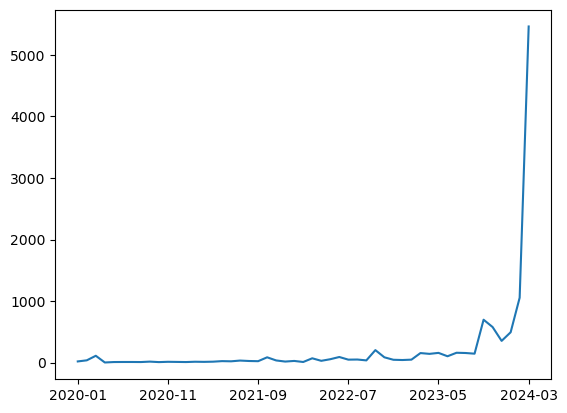

In [84]:
df_listing_2020_2024['year_month'].value_counts().sort_index().plot()